In [1]:
import pandas as pd

# 基本情報の確認
https://www.kaggle.com/c/titanic/data からtrain.csvをダウンロード

In [2]:
train = pd.read_csv('data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


・文字列データだと扱いにくいので数値データに変換

In [3]:
for label, value in [('male', 0), ('female', 1)]:
    train.loc[train.loc[:, 'Sex'] == label, 'Sex'] = value
train.loc[:, 'Sex'] = train.loc[:, 'Sex'].astype(int)

for label, value in [('C', 1), ('Q', 2), ('S', 3)]:
    train.loc[train.loc[:, 'Embarked'] == label, 'Embarked'] = value
train.loc[:, 'Embarked'] = train.loc[:, 'Embarked'].fillna(0)
train.loc[:, 'Embarked'] = train.loc[:, 'Embarked'].astype(int)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


# 各属性の確認
横軸:各属性のクラス 縦軸:生存率のグラフで可視化

In [21]:
import matplotlib.pyplot as plt

In [55]:
survival_num = (train.loc[:, 'Survived'] == 1).sum()
print('Survival num: {:}'.format(survival_num))
survival_rate = survival_num / len(train)
print('Survival rate: {:.1f}%'.format(survival_rate * 100))

Survival num: 342
Survival rate: 38.4%


In [35]:
def visualize(attr, classes, survival_rates):
    plt.title(attr)
    plt.ylim(0, 1)
    plt.scatter(classes, survival_rates)
    plt.hlines(y=[survival_rate], xmin=min(*classes), xmax=max(*classes), linestyles='dashed')
    plt.show()

Sex 0:577 1:314


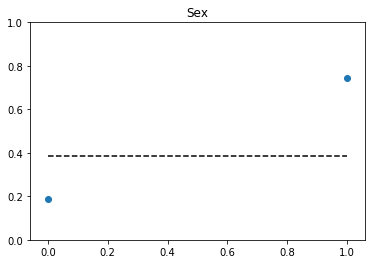

Pclass 1:216 2:184 3:491


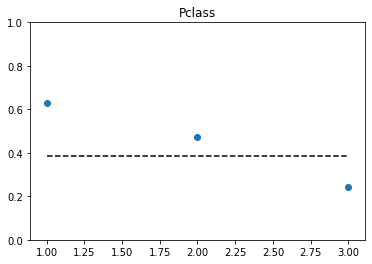

/Users/fujino/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


SibSp 0:608 1:209 2:28 3:16 4:18 5:5 6:0 7:0 8:7


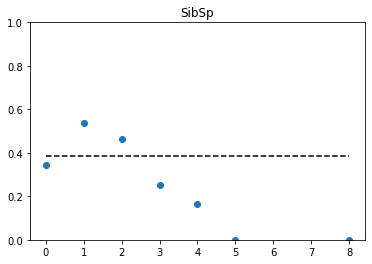

Parch 0:678 1:118 2:80 3:5 4:4 5:5 6:1


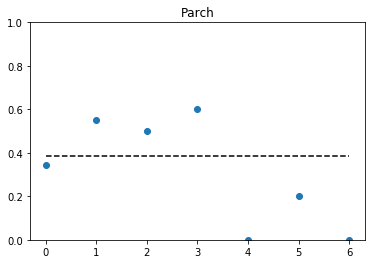

Embarked 0:2 1:168 2:77 3:644


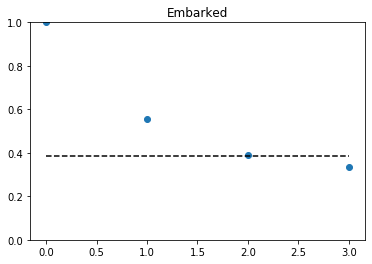

In [40]:
for attr in ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']:
    values = train.loc[:, attr]
    classes = list(range(int(values.min()), int(values.max()) + 1))
    survival_rates = []
    lens = []
    for class_ in classes:
        surv = train.loc[train.loc[:, attr] == class_, 'Survived'] == 1
        survival_rates.append(surv.sum() / len(surv)) # あるクラスの生存者数 / あるクラスの人数
        lens.append('{}:{}'.format(class_, len(surv)))
    print(attr + ' ' + ' '.join(lens))
    visualize(attr, classes, survival_rates)

Age 0:62 10:102 20:220 30:167 40:89 50:48 60:19 70:6 80:1


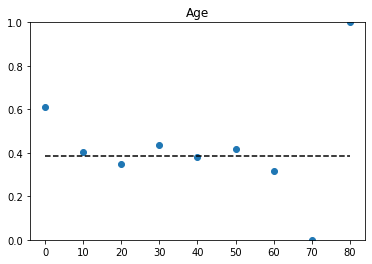

In [56]:
attr = 'Age'
step = 10
classes = list(range(0, int(train.loc[:, attr].max()) + step, step))
survival_rates = []
lens = []
for class_ in classes:
    surv = train.loc[(train.loc[:, attr] >= class_) & (train.loc[:, attr] < class_ + step), 'Survived'] == 1
    survival_rates.append(surv.sum() / len(surv))
    lens.append('{}:{}'.format(class_, len(surv)))
print(attr + ' ' + ' '.join(lens))
visualize(attr, classes, survival_rates)

Fare 0:336 10:179 20:136 30:64 40:15 50:39 60:17 70:29 80:15 90:8


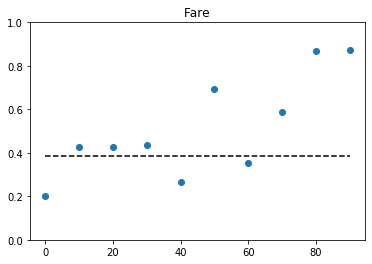

In [52]:
attr = 'Fare'
step = 10
classes = list(range(0, 90 + step, step))
survival_rates = []
lens = []
for class_ in classes:
    surv = train.loc[(train.loc[:, attr] >= class_) & (train.loc[:, attr] < class_ + step), 'Survived'] == 1
    survival_rates.append(surv.sum() / len(surv))
    lens.append('{}:{}'.format(class_, len(surv)))
print(attr + ' ' + ' '.join(lens))
visualize(attr, classes, survival_rates)

/Users/fujino/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


Fare 100:33 200:17 300:0 400:0 500:3 600:0


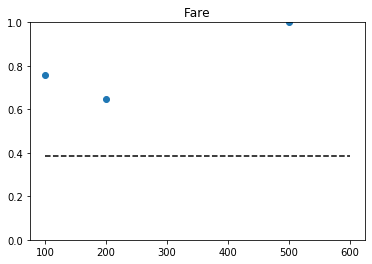

In [51]:
attr = 'Fare'
step = 100
classes = list(range(100, int(train.loc[:, attr].max()) + step, step))
survival_rates = []
lens = []
for class_ in classes:
    surv = train.loc[(train.loc[:, attr] >= class_) & (train.loc[:, attr] < class_ + step), 'Survived'] == 1
    survival_rates.append(surv.sum() / len(surv))
    lens.append('{}:{}'.format(class_, len(surv)))
print(attr + ' ' + ' '.join(lens))
visualize(attr, classes, survival_rates)

Name 0(a):819 1(b):259 2(c):347 3(d):410 4(e):767 5(f):201 6(g):256 7(h):505 8(i):681 9(j):219 10(k):239 11(l):619 12(m):883 13(n):698 14(o):598 15(p):169 16(q):10 17(r):852 18(s):702 19(t):500 20(u):278 21(v):152 22(w):212 23(x):25 24(y):228 25(z):44


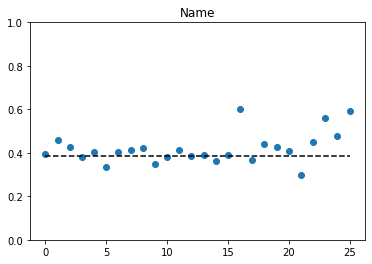

In [63]:
attr = 'Name'
values = train.loc[:, attr]
alphabets = 'abcdefghijklmnopqrstuvwxyz'
classes = []
survival_rates = []
lens = []
names = train.loc[:, attr]
for class_, char in enumerate(alphabets):
    idx = [char in name.lower() for name in names]
    surv = train.loc[idx, 'Survived'] == 1
    survival_rates.append(surv.sum() / len(surv)) # あるクラスの生存者数 / あるクラスの人数
    classes.append(class_)
    lens.append('{}({}):{}'.format(class_, char, len(surv)))
print(attr + ' ' + ' '.join(lens))
visualize(attr, classes, survival_rates)

# 欠損値の補完

In [4]:
# 欠損埋め
fill_train = train.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
med = fill_train['Age'].median()
fill_train.loc[:, 'Age'] = fill_train['Age'].fillna(med)
fill_train.info()

# 正規化

In [9]:
fill_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,0,35.0,0,0,8.0500,3


In [10]:
standardized_train = (fill_train - fill_train.mean()) / fill_train.std()
standardized_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.826913,-0.737281,-0.565419,0.432550,-0.473408,-0.502163,0.587636
1,-1.565228,1.354813,0.663488,0.432550,-0.473408,0.786404,-1.911570
2,0.826913,1.354813,-0.258192,-0.474279,-0.473408,-0.488580,0.587636
3,-1.565228,1.354813,0.433068,0.432550,-0.473408,0.420494,0.587636
4,0.826913,-0.737281,0.433068,-0.474279,-0.473408,-0.486064,0.587636
